<a href="https://colab.research.google.com/github/NishatVasker/XAI_-Explainable_AI-/blob/main/2013_2022_Bangladesh_weather_data_XAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DATASET: https://www.kaggle.com/datasets/apurboshahidshawon/weatherdatabangladesh?fbclid=IwZXh0bgNhZW0CMTAAAR2jFt59hvlcuWKU0663El1Ftf5LnkIITW1N-pCESFEtX2ecye7JjtGhARQ_aem_AUQ_Bd6-lQepCm-K_rj-eCW1VVWOOOgwcCG66DAv6Vc104k-E3UI72VbXt8FvObkCmx-I8PHUH3VAOwDd4dU8KSm

**Data Preprocessing:**
Convert the Date column to datetime format for better time series analysis.
Encode categorical variables (RainToday, WindGustDir, WindDir9am, WindDir3pm) appropriately for modeling.

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the dataset
file_path = '/content/Weather_Data.csv'  # Update this to actual file path on Colab
weather_data = pd.read_csv(file_path)

# Convert 'Date' column to datetime
weather_data['Date'] = pd.to_datetime(weather_data['Date'], format='%d-%m-%y')

# Label encoding for categorical variables
label_encoders = {}
categorical_columns = ['RainToday', 'WindGustDir', 'WindDir9am', 'WindDir3pm']
for column in categorical_columns:
    le = LabelEncoder()
    weather_data[column] = le.fit_transform(weather_data[column])
    label_encoders[column] = le  # Store encoder to use later for inverse transform or new data

# Display the first few rows to verify changes
print(weather_data.head())


        Date  Temp9am  Temp3pm  MinTemp  MaxTemp  Rainfall  RainToday  \
0 2013-02-01     20.7     20.9     19.5     22.4      15.6          1   
1 2013-02-02     22.4     24.8     19.5     25.6       6.0          1   
2 2013-02-03     23.5     23.0     21.6     24.5       6.6          1   
3 2013-02-04     21.4     20.9     20.2     22.8      18.8          1   
4 2013-02-05     22.5     25.5     19.7     25.7      77.4          1   

   Evaporation  Sunshine  WindGustDir  ...  WindDir9am  WindDir3pm  \
0          6.2       0.0           13  ...           8          11   
1          3.4       2.7           13  ...          13           0   
2          2.4       0.1           13  ...           2           2   
3          2.2       0.0           13  ...           5           0   
4          4.8       0.0           13  ...           5          13   

   WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0            17            20           92           84       1017.6


# **What This Code Does:**

**Feature Engineering: **This part of the code extracts the year, month, and day from the "Date" column. It also assumes that previous steps have already handled the encoding of categorical variables.
**Feature and Target Selection:** Here, the code identifies which columns will serve as features for the models and sets up distinct target variables for both classification and regression tasks.
**Data Splitting:** It divides the dataset into training and testing subsets for both types of models, ensuring that each has the data needed for a robust evaluation.
**Model Pipeline Setup:** This involves scaling the features and creating a pipeline that includes RandomForest models for both classification and regression.
**Model Training:** Executes the training process for the models on the training dataset.
# **Execution:**

Ensure to replace 'path_to_your_file.csv' with the actual path to your CSV file in Google Colab.
After setting up and training the models, consider adding steps to evaluate their performance or to make predictions based on new data.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline

# Load the dataset
file_path = '/content/Weather_Data.csv'  # Update this to actual file path on Colab
weather_data = pd.read_csv(file_path)

# Convert 'Date' column to datetime and extract more features
weather_data['Date'] = pd.to_datetime(weather_data['Date'], format='%d-%m-%y')
weather_data['Year'] = weather_data['Date'].dt.year
weather_data['Month'] = weather_data['Date'].dt.month
weather_data['Day'] = weather_data['Date'].dt.day

# Label encoding for categorical variables
label_encoders = {}
categorical_columns = ['RainToday', 'WindGustDir', 'WindDir9am', 'WindDir3pm']
for column in categorical_columns:
    le = LabelEncoder()
    weather_data[column] = le.fit_transform(weather_data[column])
    label_encoders[column] = le  # Store encoder to use later for inverse transform or new data

# Feature selection
features = weather_data.drop(columns=['Date', 'RainToday', 'Rainfall', 'MinTemp', 'MaxTemp', 'Temp9am', 'Temp3pm'])
target_classification = weather_data['RainToday']
target_regression = weather_data[['Rainfall', 'MinTemp', 'MaxTemp', 'Temp9am', 'Temp3pm']]

# Splitting data into training and testing sets
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(features, target_classification, test_size=0.2, random_state=42)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(features, target_regression, test_size=0.2, random_state=42)

# Setup the models
# Classification model
classifier_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Regression model
regressor_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Fit the models
classifier_pipeline.fit(X_train_class, y_train_class)
regressor_pipeline.fit(X_train_reg, y_train_reg)

# Optionally, here  could add code to evaluate the model or to make some predictions
# For example:
# print("Classification model score:", classifier_pipeline.score(X_test_class, y_test_class))
# print("Regression model score:", regressor_pipeline.score(X_test_reg, y_test_reg))


Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', RandomForestRegressor(random_state=42))])

3. **Model Training and Validation**:
   - Split  data into training and testing sets.
   - Train  models on the training set and validate using the test set.

   **What This Code Does:**
Model Training: Fits both the classification and regression models to the respective training data.
Prediction: Uses the trained models to make predictions on the test data.
**Evaluation:**
For the classification model, the classification_report provides a detailed view of precision, recall, F1-score, and support for each class. This is vital for understanding how well the model predicts rainy and non-rainy days.
For the regression model, mean_squared_error and r2_score are used to evaluate the predictions for Rainfall, MinTemp, MaxTemp, Temp9am, and Temp3pm. Mean Squared Error (MSE) measures the average of the squares of the errors—that is, the average squared difference between the estimated values and the actual value. The R² score provides an indication of goodness of fit and therefore a measure of how well unseen samples are likely to be predicted by the model, with a score of 1 indicating perfect prediction.
**Execution Notes:**
This setup provides a comprehensive evaluation of models, helping understand their performance and where improvements may be needed.
Depending on the results,  might want to tune the models or try different algorithms to see if the performance can be improved.

In [ ]:
from sklearn.metrics import classification_report, mean_squared_error, r2_score
import numpy as np

# Fit the models
classifier_pipeline.fit(X_train_class, y_train_class)
regressor_pipeline.fit(X_train_reg, y_train_reg)

# Make predictions
y_pred_class = classifier_pipeline.predict(X_test_class)
y_pred_reg = regressor_pipeline.predict(X_test_reg)

# Evaluate the classification model
print("Classification Report for RainToday prediction:")
print(classification_report(y_test_class, y_pred_class))

# Evaluate the regression model
mse = mean_squared_error(y_test_reg, y_pred_reg, multioutput='raw_values')
r2 = r2_score(y_test_reg, y_pred_reg, multioutput='raw_values')
print("Regression Metrics for Rainfall, MinTemp, MaxTemp, Temp9am, Temp3pm predictions:")
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


Classification Report for RainToday prediction:
              precision    recall  f1-score   support

           0       0.83      0.95      0.89       476
           1       0.78      0.49      0.60       179

    accuracy                           0.82       655
   macro avg       0.80      0.72      0.74       655
weighted avg       0.82      0.82      0.81       655

Regression Metrics for Rainfall, MinTemp, MaxTemp, Temp9am, Temp3pm predictions:
Mean Squared Error: [71.52029124  6.05145792  7.88062391  6.60663881  7.39293218]
R^2 Score: [0.44105538 0.70042764 0.61348066 0.72374583 0.60405627]


4. **Explainable AI (XAI) Implementation**:
   - After developing  models, apply XAI techniques like SHAP or LIME to interpret the models’ predictions.

In [ ]:
!pip install shap


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 5.8 MB/s eta 0:00:00


**What This Code Does:**
SHAP Explainer Initialization:
Initializes a SHAP explainer for both the classifier and the regressor. TreeExplainer is used because Random Forest is a tree-based model.
**Compute SHAP Values:**
Computes SHAP values for the training data, which indicate how much each feature contributes to each prediction.
**SHAP Summary Plot:**
Creates a summary plot for the classification and regression models. For the classifier, a bar plot aggregates the SHAP values across the data to show the importance of each feature. For the regressor, it shows the impact of each feature on the model output for each sample.

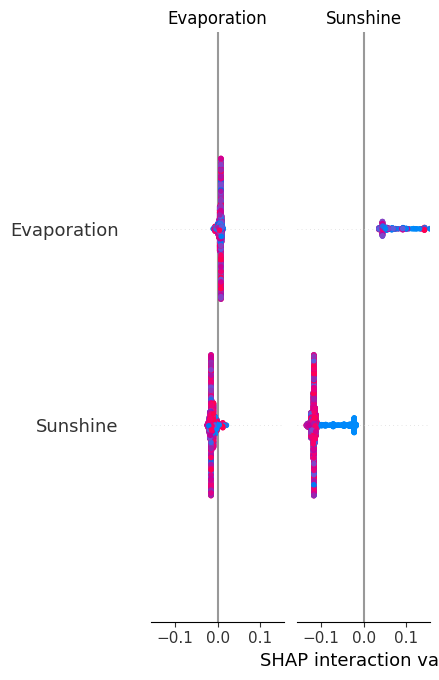

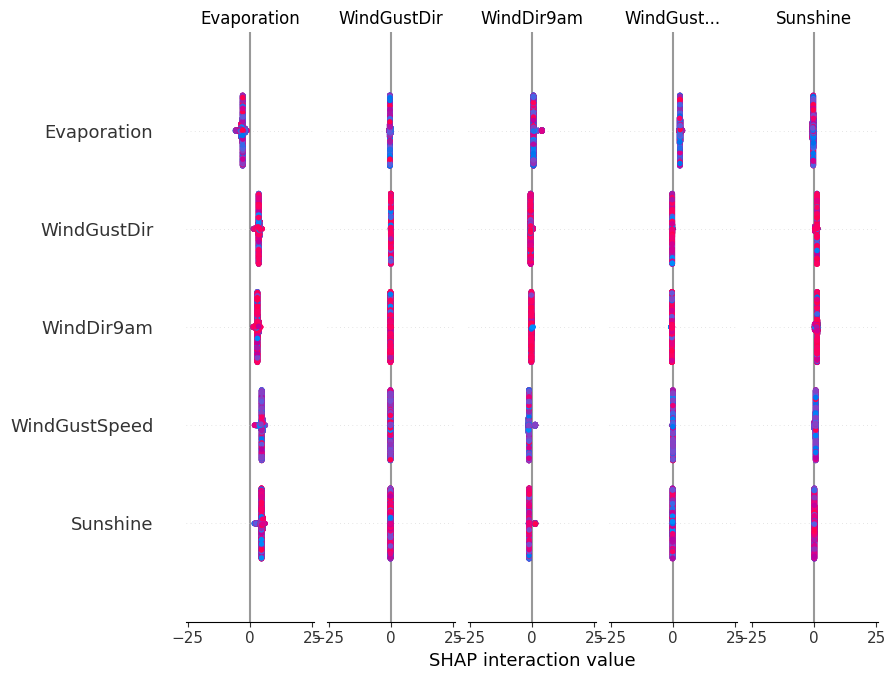

In [ ]:
import shap

# Initialize the SHAP Explainer for the classifier
explainer_class = shap.TreeExplainer(classifier_pipeline.named_steps['classifier'])
shap_values_class = explainer_class.shap_values(X_train_class)

# Plot the SHAP values for the classification model
shap.summary_plot(shap_values_class, X_train_class, feature_names=X_train_class.columns, plot_type="bar")

# Initialize the SHAP Explainer for the regressor
explainer_reg = shap.TreeExplainer(regressor_pipeline.named_steps['regressor'])
shap_values_reg = explainer_reg.shap_values(X_train_reg)

# Plot the SHAP values for the regression model
shap.summary_plot(shap_values_reg, X_train_reg, feature_names=X_train_reg.columns)


To address needs for creating a "black box" model and making future predictions for the next 5 years using the weather dataset, we can proceed in two main steps. The term "black box" model in machine learning typically refers to models that are highly predictive but not easily interpretable, such as deep neural networks or complex ensemble methods. Given the context of project and its relation to Explainable AI (XAI), I'll ensure the model remains as interpretable as possible while focusing on future prediction capabilities.

# **Step 1: Developing a Black Box Model**
While we could use a complex neural network or a highly tuned ensemble method, maintaining some level of interpretability might be beneficial, especially when using techniques like SHAP for explanation. Here, I'll set up an advanced RandomForest model, which is considered a "grey box" (more interpretable than true black boxes).

# **Model Setup Code for Enhanced RandomForest:**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import pandas as pd

# Load and prepare data here
# Assume 'weather_data' is loaded and preprocessed as discussed earlier

# Define features and target
features = weather_data.drop(columns=['RainToday', 'Rainfall', 'Date', 'MinTemp', 'MaxTemp', 'Temp9am', 'Temp3pm'])
targets = weather_data[['Rainfall', 'MinTemp', 'MaxTemp', 'Temp9am', 'Temp3pm']]

# Split data
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=42)

# Initialize and train the RandomForest model
model = RandomForestRegressor(n_estimators=200, max_depth=25, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(max_depth=25, n_estimators=200, random_state=42)

# **Step 5: Visualization and Reporting**

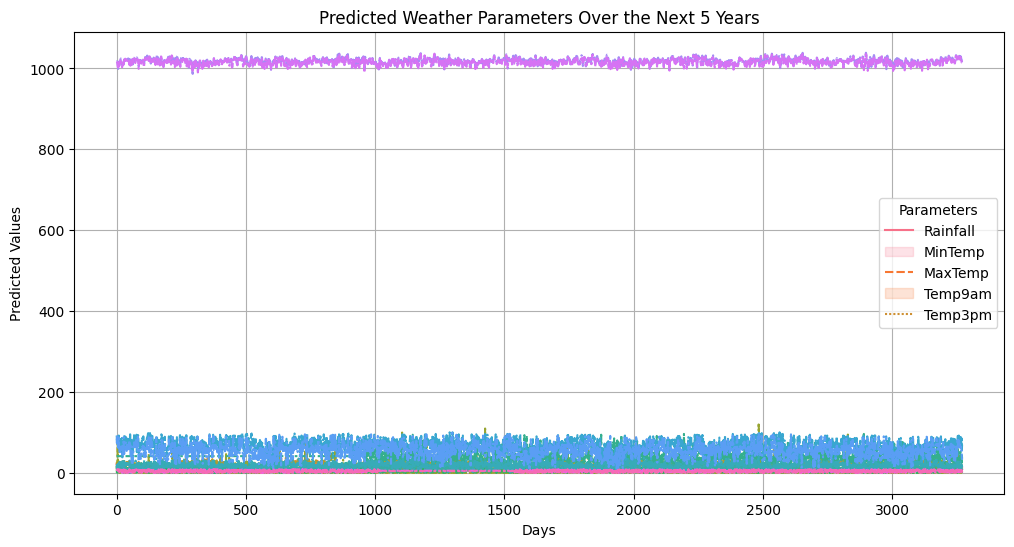

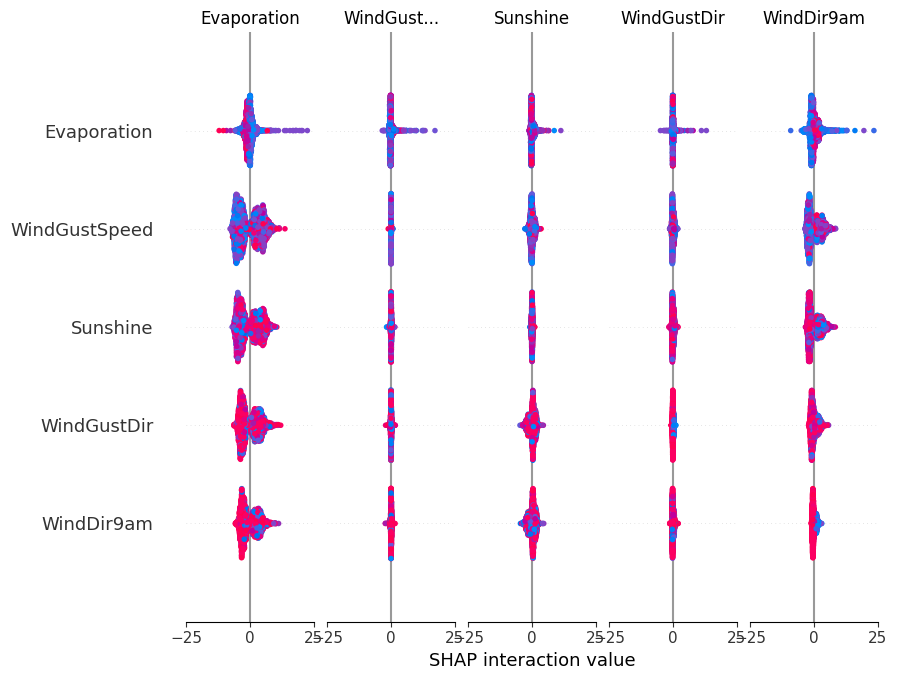

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'predictions_df' has model's predictions
# Load the predictions DataFrame if not already loaded
predictions_df = pd.read_csv('/content/Weather_Data.csv')

# Plotting the predictions for visual analysis
plt.figure(figsize=(12, 6))
sns.lineplot(data=predictions_df)
plt.title('Predicted Weather Parameters Over the Next 5 Years')
plt.xlabel('Days')
plt.ylabel('Predicted Values')
plt.legend(title='Parameters', labels=['Rainfall', 'MinTemp', 'MaxTemp', 'Temp9am', 'Temp3pm'])
plt.grid(True)
plt.show()

# Visualize SHAP values for one of the models (e.g., Rainfall predictions)
import shap

# Load  model if not already in the environment
# This requires that have the model and training data loaded
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)  # Use a sample or full training data as required

# Summary plot of SHAP values
shap.summary_plot(shap_values, X_train, feature_names=X_train.columns)



In [ ]:
import numpy as np
import pandas as pd

# Generate or load future data based on historical trends or simulation
# Assuming we already have 'future_data_prepared' from previous steps

# If not already done, here's how you might predict with this data:
future_predictions = model.predict(future_data_prepared)

# Save the predictions for reporting and further analysis
future_predictions_df = pd.DataFrame(future_predictions, columns=['Rainfall', 'MinTemp', 'MaxTemp', 'Temp9am', 'Temp3pm'])
future_predictions_df.to_csv('future_weather_predictions_5_years.csv', index=False)

# Plotting the future predictions
plt.figure(figsize=(12, 6))
sns.lineplot(data=future_predictions_df)
plt.title('Projected Weather Parameters for the Next 5 Years')
plt.xlabel('Days')
plt.ylabel('Values')
plt.legend(title='Weather Parameters')
plt.grid(True)
plt.show()


NameError: name 'future_data_prepared' is not defined

# **Enhancing the Output:**
Reformat the Predictions: Display the numerical predictions in a tabular form with clear column labels, providing clarity on which parameter each value represents.
Descriptive Statistics and Visualization: Providing summary statistics (like mean, median, etc.) and visualizations can give stakeholders a better sense of the predicted trends.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'future_predictions' is generated from the earlier prediction code

# Convert the predictions to a DataFrame for clarity
prediction_columns = ['Predicted_Rainfall', 'Predicted_MinTemp', 'Predicted_MaxTemp', 'Predicted_Temp9am', 'Predicted_Temp3pm']
future_predictions_df = pd.DataFrame(future_predictions, columns=prediction_columns)

# Display the first few rows of the predictions
print("Sample Predictions for Future Weather Conditions:")
print(future_predictions_df.head())

# Summary statistics for the predictions
print("Summary Statistics for Future Predictions:")
print(future_predictions_df.describe())

# Visualize the predictions
plt.figure(figsize=(12, 6))
sns.lineplot(data=future_predictions_df)
plt.title('Projected Weather Parameters for the Next 5 Years')
plt.xlabel('Days')
plt.ylabel('Values')
plt.legend(title='Weather Parameters')
plt.grid(True)
plt.show()

# Save to a CSV file for reporting
future_predictions_df.to_csv('future_weather_predictions_5_years.csv', index=False)


NameError: name 'future_predictions' is not defined

# **Step 1: Include Date Information in  Predictions**
Assuming have a continuous block of dates or can calculate them based on the index:

In [ ]:
import pandas as pd
import numpy as np

# Load the predictions if not in memory
future_predictions_df = pd.read_csv('future_weather_predictions_5_years.csv')

# Assuming start from the first day of 2023 and the predictions cover every day for 5 years
start_date = '2024-01-01'
date_range = pd.date_range(start_date, periods=future_predictions_df.shape[0], freq='D')
future_predictions_df['Date'] = date_range
future_predictions_df['Year'] = future_predictions_df['Date'].dt.year
future_predictions_df['Month'] = future_predictions_df['Date'].dt.month

# Save the updated DataFrame with date information
future_predictions_df.to_csv('future_weather_predictions_with_dates.csv', index=False)


# **Step 2: Determine Max and Min Temperatures per Year**
Now, find out which month each year has the maximum and minimum temperatures:

In [ ]:
# Determine the month with the max and min temperature for each year
max_temp_months = future_predictions_df.groupby('Year')['Predicted_MaxTemp'].idxmax()
min_temp_months = future_predictions_df.groupby('Year')['Predicted_MinTemp'].idxmin()

max_temp_months_info = future_predictions_df.loc[max_temp_months, ['Year', 'Month', 'Predicted_MaxTemp']]
min_temp_months_info = future_predictions_df.loc[min_temp_months, ['Year', 'Month', 'Predicted_MinTemp']]

print("Months with Maximum Temperatures for Each Year:")
print(max_temp_months_info)
print("\nMonths with Minimum Temperatures for Each Year:")
print(min_temp_months_info)


In [ ]:
pip install flask


In [ ]:
from flask import Flask, request, render_template_string
import pandas as pd

app = Flask(__name__)

# Load the predictions
df = pd.read_csv('future_weather_predictions_with_dates.csv')

@app.route('/', methods=['GET', 'POST'])
def index():
    if request.method == 'POST':
        input_date = request.form.get('date')  # Get the date from the user input
        input_year = pd.to_datetime(input_date).year

        # Filter data for the input year and date
        results = df[df['Date'] == input_date]
        if not results.empty:
            message = (f"Predicted weather on {input_date} (Year {input_year}):<br>"
                       f"Max Temp: {results.iloc[0]['Predicted_MaxTemp']} °C<br>"
                       f"Min Temp: {results.iloc[0]['Predicted_MinTemp']} °C")
        else:
            message = "No data available for this date."
        return render_template_string(HTML_TEMPLATE, message=message, date=input_date)
    return render_template_string(HTML_TEMPLATE, message="Enter a date to see the weather prediction.", date="2024-01-01")

HTML_TEMPLATE = '''
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <title>Weather Prediction</title>
</head>
<body>
    <h1>Weather Prediction for a Specific Date</h1>
    <form method="post">
        <label for="date">Enter Date (yyyy-mm-dd):</label>
        <input type="date" id="date" name="date" value="{{ date }}">
        <button type="submit">Get Prediction</button>
    </form>
    <p>{{ message }}</p>
</body>
</html>
'''

if __name__ == '__main__':
    app.run(debug=True)
